In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split 

# Question 1

Text(0, 0.5, 'no2_concentration')

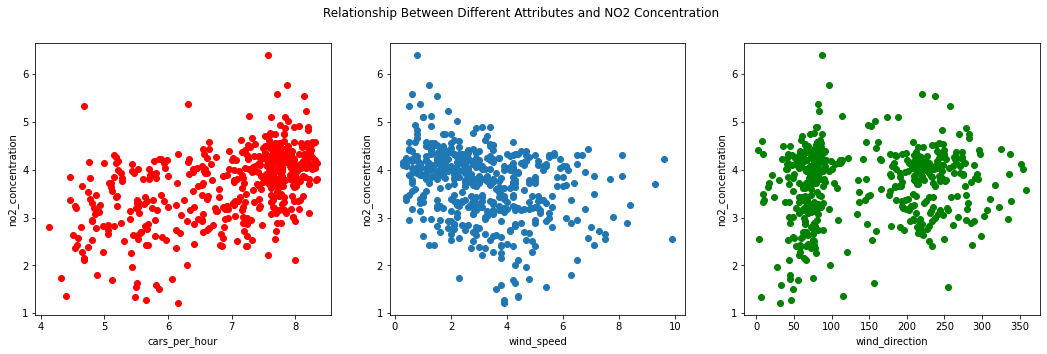

In [2]:
# 1. Import the data in Python.
data = pd.read_csv('data/no2_dataset.csv')

# 2. Explore the data. You can visualize the relationship between each attribute and NO2 concentration.
# Therefore, make three plots; each has the data points represented by one attribute (feature) and the target y (NO2).

plt.figure(3, figsize=(18, 5))
matplotlib.pyplot.suptitle("Relationship Between Different Attributes and NO2 Concentration")
plt.subplot(1,3,1)
plt.scatter(data['cars_per_hour'], data['no2_concentration'], color="red")
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[0])

plt.subplot(1,3,2)
plt.scatter(data['wind_speed'], data['no2_concentration'])
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[0])

plt.subplot(1,3,3)
plt.scatter(data['wind_direction'], data['no2_concentration'], color="green")
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[0])


In [3]:
# 4. Construct the design matrix X using φaff as explained in the lecture.
# X: design matrix
def DesignMatrix(X):
    lst = []
    for i in range(X.shape[0]):
        row = [1]
        for j in range(X.shape[1]):
            row.append(X.iloc[i][j])
        lst.append(row)
    dm = np.mat(lst)
    return dm

# 5. Implement a function named regression that takes the design matrix X and target
# vector y (NO2) and returns the regression parameter β which minimizes the RSS.
def regression(X, y):
    X_reverse = np.linalg.inv(X.T@X)
    β = X_reverse@X.T@y
    return β

def MSE1(β, dm, y):
    sum = .0
    for i in range(dm.shape[0]):
        sum = sum + (y[i] - dm[i]@β)**2
    return sum / dm.shape[0]


# dm: design matrix for data set
def MSE(β, dm, y):
    ŷ = y - dm@β
    for i in range(ŷ.shape[0]):
       ŷ[i] = ŷ[i]**2
    return ŷ.sum() / dm.shape[0]

In [4]:
# 3. Split a separate test set using train test split function in the model selection module
# of scikit-learn, with random state = 10 and test size = 0.2.

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, 1:4], data['no2_concentration'], random_state=10, test_size=0.2)

# construct a affine function f(x) = β_3x_3+  β_2x_2 + β_1x_1 + β_0 = φ_aff(x)^Tβ
# construct design matrix
dm = DesignMatrix(X_train)

# series to array
y_arr = np.stack(Y_train.values)
# transpost row array to column array(vector), -1: as many rows as needed
y = y_arr.reshape(-1, 1)

β = regression(dm, y)

print('The regression paramater vector β is:')
print(β)
# print(β.shape)

print('The affine function is:')
print('f(x) = -0.166x_2 + 0.368x_1 + 1.629')
print('x_1: cars_per_hour, x_2: wind_speed, x_3: wind_direction')

The regression paramater vector β is:
[[ 1.62876837e+00]
 [ 3.67943901e-01]
 [-1.65784385e-01]
 [-2.77279883e-05]]
The affine function is:
f(x) = -0.166x_2 + 0.368x_1 + 1.629
x_1: cars_per_hour, x_2: wind_speed, x_3: wind_direction


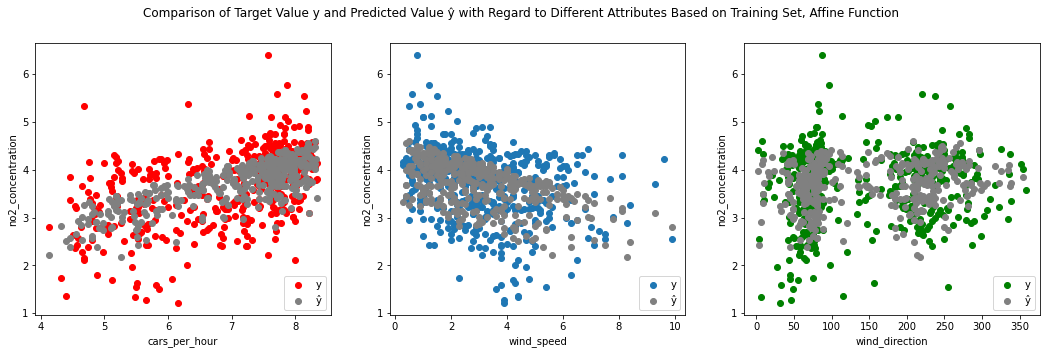

In [5]:
# plot the affine function

# prediction
ŷ = dm@β

# convert matrix to DataFrame/series
y_predict = pd.DataFrame(ŷ).stack()

plt.figure(3, figsize=(18, 5))
matplotlib.pyplot.suptitle("Comparison of Target Value y and Predicted Value ŷ with Regard to Different Attributes Based on Training Set, Affine Function")
plt.subplot(1,3,1)
plt.scatter(data['cars_per_hour'], data['no2_concentration'], color="red", label = "y")
plt.scatter(X_train['cars_per_hour'], y_predict, color="grey", label = "ŷ")
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,2)
plt.scatter(data['wind_speed'], data['no2_concentration'], label = 'y')
plt.scatter(X_train['wind_speed'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,3)
plt.scatter(data['wind_direction'], data['no2_concentration'], color="green", label = 'y')
plt.scatter(X_train['wind_direction'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')
plt.show()

In [6]:
# 7. Calculate the MSE on the training and test splits.
print("Case: affine function")

print("MSE on training set is: ")
print(MSE(β, dm, y))
# print(MSE1(β, dm, y))

# test set
dm_test = DesignMatrix(X_test)

y_arr_test = np.stack(Y_test.values)
y_test = y_arr_test.reshape(-1, 1)

print("MSE on test set is: ")
print(MSE(β, dm_test, y_test))
# print(MSE1(β, dm_test, y_test))




Case: affine function
MSE on training set is: 
0.33550514402450377
MSE on test set is: 
0.32738771572598124


# Question 2

In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# regression with different degree

# Use the PolynomialFeatures function in the preprocessing module of scikit-learn to construct the design matrix X
# degree = 2
poly_2 = PolynomialFeatures(degree=2)
dm_poly_2 = poly_2.fit_transform(X_train)

# print(dm_poly_2[0])
# print(dm_poly_2.shape)

# parameter vector
β_poly_2 = regression(dm_poly_2, y)

# MSE
# prediction
ŷ_poly_2 = dm_poly_2@β_poly_2

print("Case: polynomial, degree = 2")

print("MSE on training set is: ")
print(MSE(β_poly_2, dm_poly_2, y))
# print(MSE1(β, dm, y))

# test set
dm_test__poly_2 = poly_2.fit_transform(X_test)

print("MSE on test set is: ")
print(MSE(β_poly_2, dm_test__poly_2, y_test))

Case: polynomial, degree = 2
MSE on training set is: 
0.29816339107848244
MSE on test set is: 
0.29573719515307983


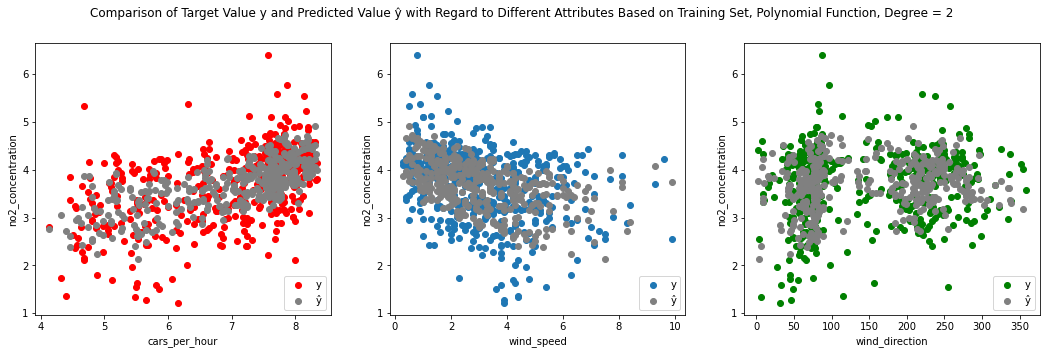

In [9]:
# convert matrix to DataFrame/series
y_predict = pd.DataFrame(ŷ_poly_2).stack()

plt.figure(3, figsize=(18, 5))
matplotlib.pyplot.suptitle("Comparison of Target Value y and Predicted Value ŷ with Regard to Different Attributes Based on Training Set, Polynomial Function, Degree = 2")
plt.subplot(1,3,1)
plt.scatter(data['cars_per_hour'], data['no2_concentration'], color="red", label = "y")
plt.scatter(X_train['cars_per_hour'], y_predict, color="grey", label = "ŷ")
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,2)
plt.scatter(data['wind_speed'], data['no2_concentration'], label = 'y')
plt.scatter(X_train['wind_speed'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,3)
plt.scatter(data['wind_direction'], data['no2_concentration'], color="green", label = 'y')
plt.scatter(X_train['wind_direction'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

In [10]:
# degree = 3
poly_3 = PolynomialFeatures(degree=3)
dm_poly_3 = poly_3.fit_transform(X_train)

# parameter vector
β_poly_3 = regression(dm_poly_3, y)

# MSE
# prediction
ŷ_poly_3 = dm_poly_3@β_poly_3

print("Case: polynomial, degree = 3")

print("MSE on training set is: ")
print(MSE(β_poly_3, dm_poly_3, y))
# print(MSE1(β, dm, y))

# test set
dm_test__poly_3 = poly_3.fit_transform(X_test)

print("MSE on test set is: ")
print(MSE(β_poly_3, dm_test__poly_3, y_test))



Case: polynomial, degree = 3
MSE on training set is: 
0.27761549258741824
MSE on test set is: 
0.35158265483496565


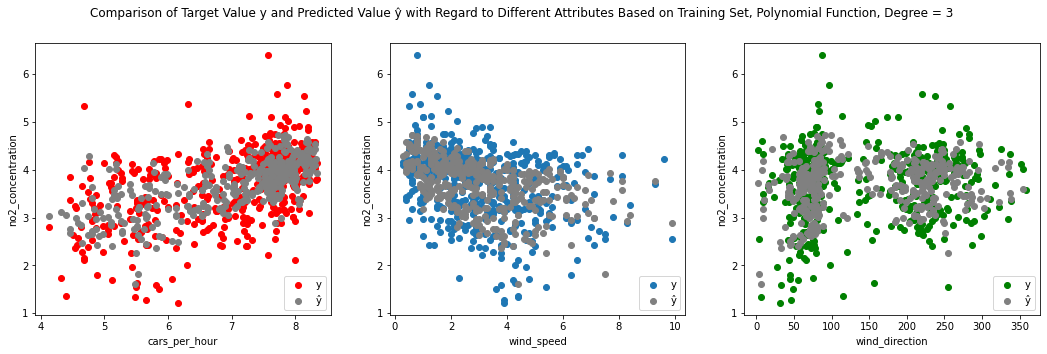

In [11]:
# convert matrix to DataFrame/series
y_predict = pd.DataFrame(ŷ_poly_3).stack()

plt.figure(3, figsize=(18, 5))
matplotlib.pyplot.suptitle("Comparison of Target Value y and Predicted Value ŷ with Regard to Different Attributes Based on Training Set, Polynomial Function, Degree = 3")
plt.subplot(1,3,1)
plt.scatter(data['cars_per_hour'], data['no2_concentration'], color="red", label = "y")
plt.scatter(X_train['cars_per_hour'], y_predict, color="grey", label = "ŷ")
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,2)
plt.scatter(data['wind_speed'], data['no2_concentration'], label = 'y')
plt.scatter(X_train['wind_speed'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,3)
plt.scatter(data['wind_direction'], data['no2_concentration'], color="green", label = 'y')
plt.scatter(X_train['wind_direction'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

In [12]:
# degree = 4
poly_4 = PolynomialFeatures(degree=4)
dm_poly_4 = poly_4.fit_transform(X_train)

# parameter vector
β_poly_4 = regression(dm_poly_4, y)

# MSE
# prediction
ŷ_poly_4 = dm_poly_4@β_poly_4

print("Case: polynomial, degree = 4")

print("MSE on training set is: ")
print(MSE(β_poly_4, dm_poly_4, y))
# print(MSE1(β, dm, y))

# test set
dm_test__poly_4 = poly_4.fit_transform(X_test)

print("MSE on test set is: ")
print(MSE(β_poly_4, dm_test__poly_4, y_test))



Case: polynomial, degree = 4
MSE on training set is: 
0.2658454694791637
MSE on test set is: 
0.31913061089330436


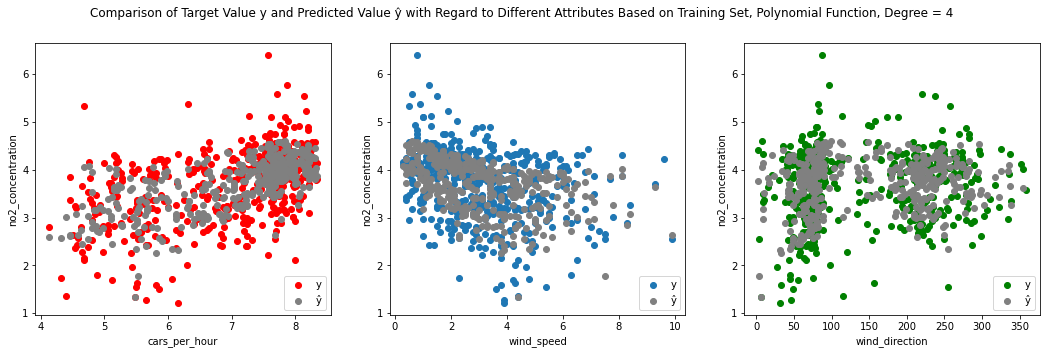

In [13]:
# convert matrix to DataFrame/series
y_predict = pd.DataFrame(ŷ_poly_4).stack()

plt.figure(3, figsize=(18, 5))
matplotlib.pyplot.suptitle("Comparison of Target Value y and Predicted Value ŷ with Regard to Different Attributes Based on Training Set, Polynomial Function, Degree = 4")
plt.subplot(1,3,1)
plt.scatter(data['cars_per_hour'], data['no2_concentration'], color="red", label = "y")
plt.scatter(X_train['cars_per_hour'], y_predict, color="grey", label = "ŷ")
plt.xlabel(data.columns[1])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,2)
plt.scatter(data['wind_speed'], data['no2_concentration'], label = 'y')
plt.scatter(X_train['wind_speed'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

plt.subplot(1,3,3)
plt.scatter(data['wind_direction'], data['no2_concentration'], color="green", label = 'y')
plt.scatter(X_train['wind_direction'], y_predict, color="grey", label = 'ŷ')
plt.xlabel(data.columns[3])
plt.ylabel(data.columns[0])
plt.legend(loc = 'lower right')

In [14]:
# degree = 5
poly_5 = PolynomialFeatures(degree=5)
dm_poly_5 = poly_5.fit_transform(X_train)

# parameter vector
β_poly_5 = regression(dm_poly_5, y)

# MSE
# prediction
ŷ_poly_5 = dm_poly_5@β_poly_5

print("Case: polynomial, degree = 5")

print("MSE on training set is: ")
print(MSE(β_poly_5, dm_poly_5, y))
# print(MSE1(β, dm, y))

# test set
dm_test__poly_5 = poly_5.fit_transform(X_test)

print("MSE on test set is: ")
print(MSE(β_poly_5, dm_test__poly_5, y_test))


Case: polynomial, degree = 5
MSE on training set is: 
0.2423906824157295
MSE on test set is: 
0.59622701001544


# Question 3

In [15]:
def f_D1(x):
  return -2*x + 0.6

def f_D2(x):
  return -1.4*x + 0.4

def f_D3(x):
  return -2*x + 0.8

def f_star(x):
  return -x + 1
  
def ExpectedValue(a,b,c):
  return (a+b+c)/3

def bias2(x):
  return np.square(f_star(x) - ExpectedValue(f_D1(x),f_D2(x),f_D3(x))) 

def variance(x):
  return  ExpectedValue(f_D1(x)*f_D1(x),f_D2(x)*f_D2(x),f_D3(x)*f_D3(x)) - np.square(ExpectedValue(f_D1(x),f_D2(x),f_D3(x)))

#let x = 2 
print('bias^2 = ' + str("{:.1f}".format(bias2(2))))
print('variance = '+ str("{:.1f}".format(variance(2))))

bias^2 = 4.0
variance = 0.2


# Question 4

## **The correct answer is B:**

The neutral network implemented with only linear units can only lead to a linear classification. That means, no matter how many layers and neurons there are, if we only use linear activations, the result from the output layer can also be derived from the linear function of the first layer. Thus, it makes no sense whether we have one or multiple layers.

The plot explicitly illustrates that the data is not linearly separable. Therefore, we cannot use a linear activation function, and both **option A, C** are incorrect.

As it has been mentioned in the lecture that any continuous function can be arbitrarily well approximated by a single layer of neutral network with non-linear activations, we conclude that the data in this question can be classified by a MLP with one hidden layer and non-linear activation.

Thus, **option D** is wrong and we choose **option B** as the answer for this question.

Actually, we can verify our conclusions by applying *MLPClassifier* function of *sklearn.neural_network*. We generated the dataset manuelly and chose different actiation functions with varied layers to figure out how MLP works.

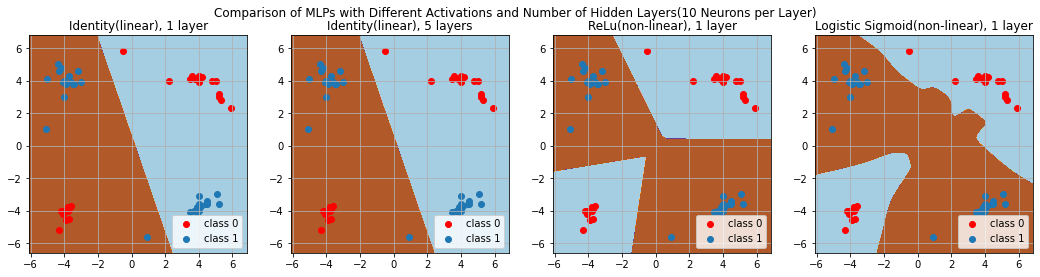

In [16]:
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier

data_4 = pd.read_csv('data/q4.csv')
data_4.drop([len(data_4)-1],inplace=True)
X = data_4.iloc[:, 0:2]
Y = data_4.iloc[:, 2:3]
Y = Y.values.ravel()

Y_0 = data_4[data_4.y == 0].values
Y_1 = data_4[data_4.y == 1].values


# activation function: 
# identity: linear / logistic: logistic Sigmoid function / tanh: hyperbolic tan function / relu: ReLu
mlp = MLPClassifier(solver='lbfgs', activation='identity', hidden_layer_sizes=[10])
mlp.fit(X.values, Y)

mlp_1 = MLPClassifier(solver='lbfgs', activation='identity', hidden_layer_sizes=[10, 10, 10, 10, 10])
mlp_1.fit(X.values, Y)

mlp_2 = MLPClassifier(solver='lbfgs', activation='relu', hidden_layer_sizes=[10])
mlp_2.fit(X.values, Y)

mlp_3 = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=[10])
mlp_3.fit(X.values, Y)


h = 0.02
x_min, x_max = X['X_1'].min() - 1, X['X_1'].max() + 1
y_min, y_max = X['X_2'].min() - 1, X['X_2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Z_1 = mlp_1.predict(np.c_[xx.ravel(), yy.ravel()])
Z_1 = Z_1.reshape(xx.shape)

Z_2 = mlp_2.predict(np.c_[xx.ravel(), yy.ravel()])
Z_2 = Z_2.reshape(xx.shape)

Z_3 = mlp_3.predict(np.c_[xx.ravel(), yy.ravel()])
Z_3 = Z_3.reshape(xx.shape)


plt.figure(4, figsize=(18, 4))
matplotlib.pyplot.suptitle("Comparison of MLPs with Different Activations and Number of Hidden Layers(10 Neurons per Layer)")
plt.subplot(1,4,1)
plt.title("Identity(linear), 1 layer")
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
l1 = plt.scatter(Y_0[:, 0], Y_0[:, 1], color = 'red', marker = 'o', label = 'class 0')
l2 = plt.scatter(Y_1[:, 0], Y_1[:, 1], marker = 'o', label = 'class 1')
plt.legend(handles = [l1, l2], loc = 'lower right')
plt.grid(True)


plt.subplot(1,4,2)
plt.title("Identity(linear), 5 layers")
plt.contourf(xx, yy, Z_1, cmap=plt.cm.Paired)
l3 = plt.scatter(Y_0[:, 0], Y_0[:, 1], color = 'red', marker = 'o', label = 'class 0')
l4 = plt.scatter(Y_1[:, 0], Y_1[:, 1], marker = 'o', label = 'class 1')
plt.legend(handles = [l3, l4], loc = 'lower right')
plt.grid(True)


plt.subplot(1,4,3)
plt.title("ReLu(non-linear), 1 layer")
plt.contourf(xx, yy, Z_2, cmap=plt.cm.Paired)
l5 = plt.scatter(Y_0[:, 0], Y_0[:, 1], color = 'red', marker = 'o', label = 'class 0')
l6 = plt.scatter(Y_1[:, 0], Y_1[:, 1], marker = 'o', label = 'class 1')
plt.legend(handles = [l5, l6], loc = 'lower right')
plt.grid(True)

plt.subplot(1,4,4)
plt.title("Logistic Sigmoid(non-linear), 1 layer")
plt.contourf(xx, yy, Z_3, cmap=plt.cm.Paired)
l5 = plt.scatter(Y_0[:, 0], Y_0[:, 1], color = 'red', marker = 'o', label = 'class 0')
l6 = plt.scatter(Y_1[:, 0], Y_1[:, 1], marker = 'o', label = 'class 1')
plt.legend(handles = [l5, l6], loc = 'lower right')
plt.grid(True)
plt.show()

# Question 5

## The correct answer is C


### A. The width of the kernel in layer S2 is 3.
The kernel in S2 cannot be 3 as no padding is used. 2 × 2 kernel and stride 2 will give us exact 31 × 31 feature maps (62 - 2) / 2  + 1 = 31.  If the kernel is 3 × 3, then the feature size will be floor(( 62 - 3 ) / 2) + 1 = 30, which is incorrect.

### B. The number of the feature maps in layer S2 is 3.
The number of feature layers in S2 is 6.

### C. The number of parameters (weights, bias) in layer F3 is 23068.
The number of parameters in layer F3 is（6 × 31 × 31 + 1）× 4 = 23068.

### D. The total number of network parameters (weights, bias) is 23136.
The total number of network parameters is not 23136.

The first layer: (3 * 3 * 1 + 1)*6 = 60

The second layer: 0 (max pooling)

The third layer: (6 * 31 * 31 + 1）* 4 = 23068

The forth layer: 2 * 4 + 1 * 2 = 10

Total : 23138